# **Introduction to Causality in Data Analysis** 🌟

Causality is a foundational concept in data analysis, as it focuses on understanding and quantifying how variables influence one another. While correlation tells us how variables are statistically related, causality explains the mechanism of influence between them.

---

## **🎯 Definition and Significance of Causality in Machine Learning**

### **What is Causality?**

Causality studies the relationship where **one variable (cause)** has a direct impact on **another variable (effect)**. Unlike correlation, which describes how variables move together, causality explains why one influences the other.

#### **Key Features of Causality:**
1. **Directionality:**
   - Causality always has a direction. For example, smoking causes lung cancer, not the other way around.
2. **Mechanism:**
   - There is a logical or scientific explanation connecting the cause to the effect.
   - Example: Fertilizer contains nutrients, which directly promote plant growth, leading to higher crop yields.
3. **Consistency:**
   - The relationship is consistent across different experiments or scenarios.
   - Example: Smoking increases the risk of lung cancer across all populations.

#### **Example of Causality in Action:**
- **Cause:** Increasing fertilizer usage.
- **Effect:** Higher crop yields.
- **Mechanism:** The nutrients in the fertilizer improve soil fertility and plant growth.

Causality is crucial because it helps to:
1. **Make Better Decisions:** By understanding the root causes of outcomes, we can target the right variables.
   - Example: A company experiencing a sales drop can identify whether the cause is poor marketing, pricing issues, or increased competition.
2. **Predict the Impact of Interventions:**
   - Example: Predicting how a reduction in taxes will influence consumer spending.
3. **Avoid Misinterpretations:** Preventing spurious correlations from leading to incorrect conclusions.
   - Example: Ice cream sales and shark attacks both increase in summer, but one does not cause the other.

---

## **📜 Historical Perspective: From Correlation to Causation**

Understanding causality has evolved over time:

### **1. The Era of Correlation**
Early statistical methods focused on finding relationships between variables using correlation.
- Correlation measures how closely two variables move together:
  - A value close to +1: Strong positive relationship.
  - A value close to -1: Strong negative relationship.
  - A value near 0: No linear relationship.
  
#### **Example of Correlation:**
- Ice cream sales and shark attacks correlate positively because both increase during summer months.

### **2. The "Correlation Does Not Imply Causation" Era**
Statisticians realized that correlation often misleads due to:
- **Confounding variables:** Third variables influencing both correlated variables.
  - Example: Ice cream sales and drowning are correlated, but the real cause is hot weather.
- **Reverse causation:** Mistaking the effect for the cause.
  - Example: Higher income correlates with better health. Does higher income cause better health, or does better health allow people to earn more?

### **3. The Causal Revolution**
Led by researchers like Judea Pearl, causality introduced new tools to understand cause-effect relationships:
1. **Causal Graphs:** Visual tools like Directed Acyclic Graphs (DAGs) to represent causal relationships.
2. **Structural Causal Models (SCMs):** Systems that simulate causal effects and predict the impact of interventions.
3. **Do-calculus:** A mathematical framework to reason about interventions and counterfactuals.

---

## **Key Principles of Causal Inference**

### **1. Causal Graphs and Directed Acyclic Graphs (DAGs)**
DAGs are visual representations of variables (nodes) and their causal relationships (edges).

#### **Key Features:**
- Directed: Arrows indicate the direction of causation.
- Acyclic: No feedback loops are allowed.

#### **Example of a DAG:**
- Smoking → Lung Cancer.
- Smoking → Heart Disease.
  
Here, "Smoking" is the common cause of both outcomes.

#### **Applications of DAGs:**
1. Identify confounders (variables affecting both cause and effect).
2. Visualize and test causal assumptions.

### **2. Counterfactual Reasoning**
Counterfactuals involve asking "what-if" questions about alternate scenarios.
- Example: What would have happened if a patient took a different drug?

#### **Why Counterfactuals Are Important:**
- They help us predict outcomes for untested scenarios.
- Example: Simulating the effects of a new public health policy before implementation.

### **3. Interventions**
Interventions involve actively changing one variable to observe its effect.
- Example: Conducting an A/B test to evaluate two marketing strategies.

#### **Role of Interventions:**
- Observational data shows patterns but cannot confirm causality. Interventions, however, establish cause-effect relationships.

## **🔍 Visualizing Correlation without Causation**

Here’s how to visualize correlation that does not imply causation:

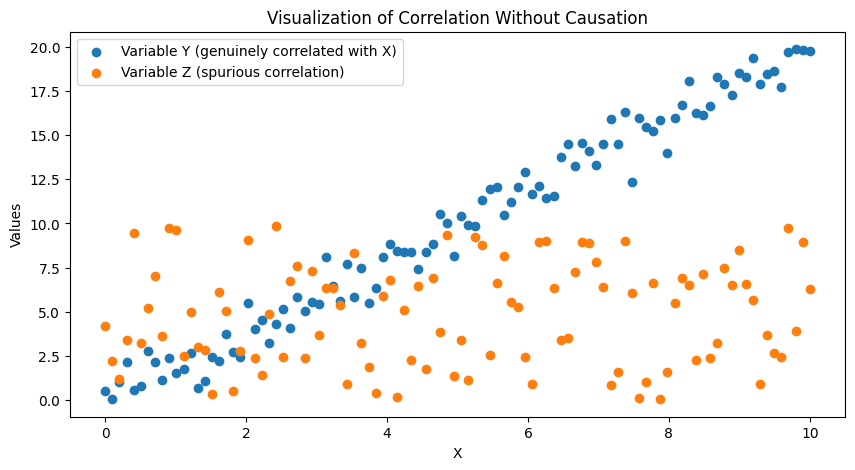

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = x * 2 + np.random.normal(size=100)  # A genuine correlation
z = np.random.random(100) * 10          # Spurious correlation

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Variable Y (genuinely correlated with X)")
plt.scatter(x, z, label="Variable Z (spurious correlation)")
plt.legend()
plt.xlabel("X")
plt.ylabel("Values")
plt.title("Visualization of Correlation Without Causation")
plt.show()


## Key Takeaway:

The plot demonstrates the difference between **correlation** and **causation**. Although both variables Y and Z show a correlation with X in the scatter plot, the code that generated the data reveals the truth:

- **Variable Y** has a genuine **causal relationship** with X. The formula `y = x * 2 + noise` shows that Y is indeed calculated based on the values in X.
  
- **Variable Z** has a **spurious correlation**. The random generation of Z values independent of X indicates no real connection between them.


# Visualization of Causal Effect


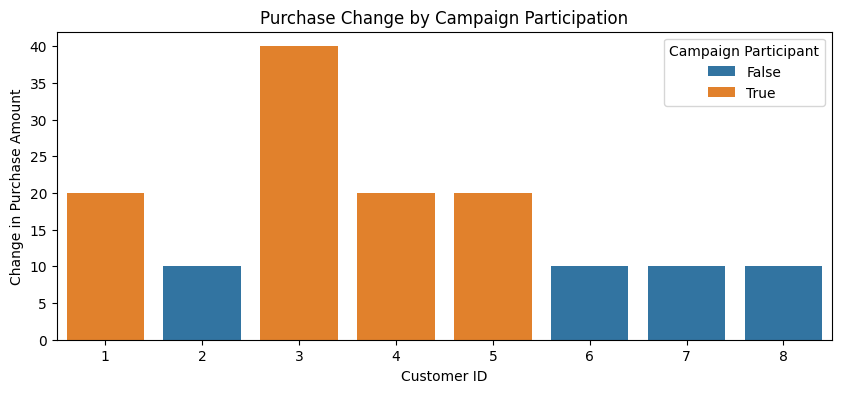

Average Causal Effect of the Marketing Campaign: 15.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample Data: Sales data before and after the marketing campaign, with customer purchase amount
data = pd.DataFrame({
    'Customer ID': [1, 2, 3, 4, 5, 6, 7, 8],
    'Purchase Before Campaign': [200, 180, 210, 250, 300, 150, 100, 50],
    'Purchase After Campaign': [220, 190, 250, 270, 320, 160, 110, 60]
})

# Adding a 'Campaign Participant' column to indicate who participated in the campaign
# Assume the campaign targeted customers who made purchases of $200 or more before the campaign
data['Campaign Participant'] = data['Purchase Before Campaign'] >= 200

# Calculating the change in purchases
data['Purchase Change'] = data['Purchase After Campaign'] - data['Purchase Before Campaign']

# Plotting the results
plt.figure(figsize=(10, 4))
sns.barplot(x='Customer ID', y='Purchase Change', hue='Campaign Participant', data=data)
plt.title('Purchase Change by Campaign Participation')
plt.ylabel('Change in Purchase Amount')
plt.xlabel('Customer ID')
plt.show()

# Analyzing the Causal Effect of the Campaign
# Calculate the average causal effect of the campaign
average_effect = data[data['Campaign Participant']]['Purchase Change'].mean() - data[~data['Campaign Participant']]['Purchase Change'].mean()
print(f"Average Causal Effect of the Marketing Campaign: {average_effect}")


### **Analysis** 📊

The barplot illustrates the change in customer purchase amounts before and after the marketing campaign, with a distinction between those who participated in the campaign (customers who made purchases of $200 or more before the campaign) and those who did not.

- **For Campaign Participants (Customers with Purchases >= $200):**
  - Customers who participated in the campaign experienced a noticeable increase in their purchase amounts after the campaign.
  - On average, these customers saw a positive change in their purchases, suggesting that the marketing campaign had a **positive impact** on their purchasing behavior.

- **For Non-Participants (Customers with Purchases < $200):**
  - Customers who did not meet the participation criteria (those who spent less than $200 before the campaign) showed little to no change in their purchase amounts.
  - This indicates that the campaign did not significantly affect this group, or that the marketing efforts were not targeted towards them.

- **Comparison:**
  - The plot highlights a clear difference in purchase changes between campaign participants and non-participants. Participants in the campaign generally saw an increase in their purchases, while non-participants did not experience any meaningful change.

### **Key Insights:**
- **Positive Causal Effect**: The marketing campaign seems to have successfully increased the purchase amounts for targeted customers (those who spent $200 or more before the campaign).
- **Targeted Impact**: The campaign appears to have been more effective for customers who were already spending higher amounts before the campaign, likely because they were the focus of the marketing efforts.
- **Causal Inference**: The difference in purchase changes between participants and non-participants can be interpreted as a potential causal effect of the marketing campaign, assuming that other factors (such as seasonality or external events) were controlled.

### **Average Causal Effect:**
The average causal effect of the marketing campaign was calculated by subtracting the average change in purchase amounts of non-participants from that of the participants. The result indicates the overall impact of the campaign on the target group.

In conclusion, the analysis suggests that the marketing campaign had a positive causal effect on the purchase behavior of customers who were targeted by the campaign.


### Deep Dive into Correlation and Causation

#### Understanding the Difference: Correlation vs. Causation

- **Correlation**:
   - Correlation measures a statistical relationship between two variables. When one variable changes, the other tends to change in a similar or opposite direction, but this does not necessarily mean that one variable is causing the change in the other. It simply indicates that both variables are related in some way.
   
   - **Example**: There might be a **correlation** between the number of hours of sunlight and ice cream sales during summer. As the hours of sunlight increase, ice cream sales also tend to increase. However, the increase in sunlight does not directly cause the rise in ice cream sales. Both are likely influenced by the **seasonal** factor — summer weather.

- **Causation**:
   - Causation, on the other hand, implies a **direct cause-and-effect relationship**. A change in one variable leads to a change in the other.
   
   - **Example**: If a company installs better lighting in its store, the increased visibility and ambiance could **cause** an increase in customer purchases. In this case, the new lighting has a direct effect on customer behavior.

---

#### Common Misconceptions: Real-world Examples

1. **Rainfall and Coffee Sales**:
   - There is often a **correlation** between rainy days and the sale of hot beverages, like coffee. On rainy days, coffee sales increase, while on sunny days they decrease.
   - However, **rainy weather does not directly cause** people to buy more coffee. The underlying factor is **weather preferences** — people tend to crave hot drinks on cold, rainy days. It's not the rain causing the sales, but rather the comfort-seeking behavior driven by weather conditions.

2. **Physical Activity and Weight Loss**:
   - A correlation may exist between people engaging in more physical activity and losing weight. However, **exercising more does not automatically cause weight loss**. There are various other factors at play, such as diet, metabolism, genetics, and lifestyle choices.
   - While exercise can contribute to weight loss, it is not the only determining factor, making it important to control for other variables when assessing causality.

---

#### Scenario: Effect of Online Training on Employee Productivity

Let’s walk through a different scenario where we want to understand if participating in an online training program **causally** improves employee productivity.

- **Assumption**: An online training program has been rolled out to employees in a company, aimed at improving their productivity. Productivity is measured by the output of work completed by employees.
  
- **Goal**: The goal is to determine if participating in the online training program causally improves employee productivity.

---

#### Steps for Causal Analysis:

1. **Establish a Control Group**:
   - In this case, the first step is to establish a **control group** of employees who do not participate in the training program. These employees should be similar to the participants in terms of their baseline productivity levels, job roles, and working conditions. This ensures that we can isolate the effect of the training from other factors that might influence productivity.

2. **Measure Productivity Changes**:
   - Productivity should be measured before and after the training program for both participants and non-participants. This allows for a comparison of how each group’s productivity evolves over time.
   - **Example**: Measure the number of tasks completed, sales made, or customer support tickets closed by employees before and after the program.

3. **Control for Confounders**:
   - Confounders are external variables that could impact the outcome, such as changes in team dynamics, work environment, or other professional development programs.
   - **Example**: If employees in the training group are also given more responsibility or better work tools, these factors should be accounted for to ensure that any observed productivity increase is due to the training itself and not external influences.

4. **Use Causal Inference Techniques**:
   - **Randomized Controlled Trials (RCT)**: In an ideal scenario, employees would be randomly assigned to either the training program or a control group. This ensures that the groups are comparable and that the training itself is the only significant difference between the two.
   - **Difference-in-Differences (DiD)**: In a real-world setting, if random assignment isn’t possible, DiD analysis could be used to compare changes in productivity over time between the participants and non-participants.

---

# **🛠 Foundations of Causal Inference**

Causal inference involves understanding cause-and-effect relationships using observational or experimental data. It consists of methods for discovering causal structures and estimating causal effects.

---

### Techniques for Causal Discovery

Causal discovery involves identifying the structure of relationships among variables to understand how one variable influences another. Two primary approaches to this are **Constraint-Based Methods** and **Score-Based Methods**:

#### 1. **Constraint-Based Methods**
These methods focus on testing conditional independence between pairs of variables, using the principle that if two variables are independent, given a third variable, there is no direct causal link between them. In other words, if two variables don't influence each other after accounting for a third variable, then the relationship is not causal.

- **Key Idea**: If two variables are independent given a third variable, then they do not have a direct causal relationship.
  
- **Example**: The **PC algorithm** is one well-known method in causal discovery. It works by iteratively testing conditional independence relationships between variables, constructing a causal graph by connecting only those variables that are not conditionally independent.

#### 2. **Score-Based Methods**
These methods assign scores to different possible causal graphs, and the graph with the highest score (i.e., best fit) is selected. The scores typically reflect how well the graph explains the observed data, often by maximizing the likelihood of the observed relationships.

- **Key Idea**: The best causal graph is the one that most accurately explains the data, based on a score that measures the fit.
  
- **Example**: **Bayesian networks** use score-based methods where the model evaluates different causal structures by considering the likelihood of the observed data, adjusting the graph to maximize the likelihood function.

---

### Estimating Causal Effects

Estimating causal effects focuses on measuring how a change in one variable (the cause) leads to a change in another (the effect). This often involves dealing with confounding factors and ensuring that the observed relationship is truly causal and not just correlated.

#### 1. **Difference-in-Differences (DiD)**
DiD is a statistical technique used to estimate causal relationships by comparing the changes in outcomes over time between a treatment group and a control group. The idea is to measure the difference in the outcome for both groups before and after an intervention (treatment), isolating the effect of the treatment from other factors.

- **Definition**: Compares the changes in outcomes for treated and untreated groups before and after an intervention, estimating the causal effect by subtracting the pre-treatment difference from the post-treatment difference.
  
- **Use Case**: DiD is commonly used for policy evaluation or studying the effects of interventions where randomized control trials are not feasible.
  
- **Example**: If a government introduces a new tax law, DiD could be used to assess how this law impacts employment rates by comparing the rate changes in regions affected by the law (treatment group) versus regions not affected (control group) over time.

#### 2. **Instrumental Variables (IV)**
Instrumental variables (IV) are used to address confounding, which occurs when an external variable influences both the treatment and the outcome. The IV method relies on finding an instrument (a third variable) that affects the treatment but does not directly affect the outcome except through its effect on the treatment.

- **Definition**: Uses an external variable (instrument) that influences the treatment but is not directly related to the outcome, ensuring that the instrument only affects the outcome through the treatment.
  
- **Use Case**: IV is particularly useful in observational studies where random assignment is not possible and where there are concerns that an unobserved variable may be affecting both the treatment and the outcome.
  
- **Example**: If studying the effect of outdoor activities on health, weather could serve as an instrument. Weather affects whether people engage in outdoor activities (treatment), but it does not directly affect health, except through the treatment of increased outdoor activity.



In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00


# Case Study: Analyzing the Impact of Training Programs on Employee Performance

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from statsmodels.formula.api import ols
import statsmodels.api as sm


# Step 1: Load the Dataset  
First we will Load the dataset into a pandas DataFrame.

In [2]:
file_path = '/content/Data Science Jobs Salaries.csv'
data = pd.read_csv(file_path)

# Step 2: Inspect the Dataset  
We will Check the structure, missing values, and summary statistics.

In [3]:
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:\n", data.describe())



Dataset Head:
   work_year experience_level employment_type                  job_title  \
0     2021e               EN              FT    Data Science Consultant   
1      2020               SE              FT             Data Scientist   
2     2021e               EX              FT       Head of Data Science   
3     2021e               EX              FT               Head of Data   
4     2021e               EN              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   54000             EUR          64369                 DE            50   
1   60000             EUR          68428                 GR           100   
2   85000             USD          85000                 RU             0   
3  230000             USD         230000                 RU            50   
4  125000             USD         125000                 US           100   

  company_location company_size  
0               DE            L  
1  

There are no missing values

# Step 3: Exploratory Data Analysis (EDA)  
Visualize distributions, relationships, and correlations in the data.

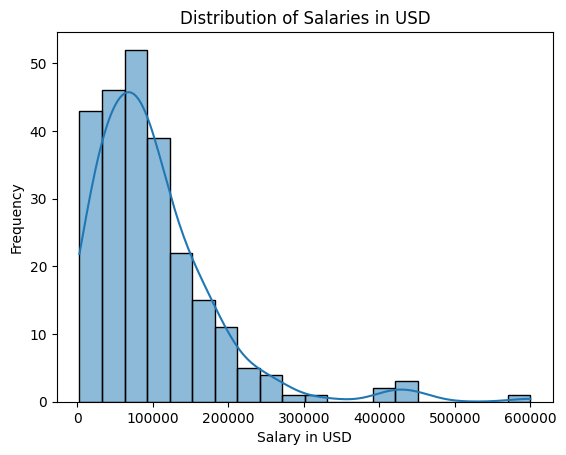

In [4]:

sns.histplot(data['salary_in_usd'], kde=True, bins=20)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

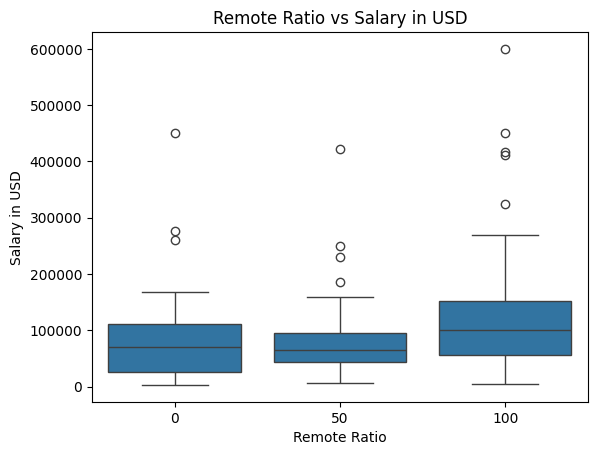

In [5]:
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Remote Ratio vs Salary in USD')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

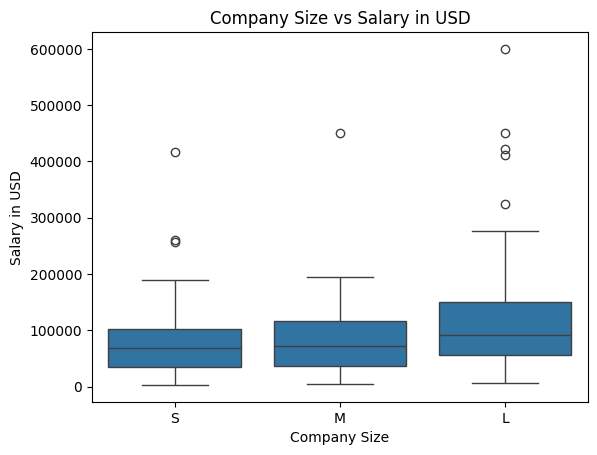

In [6]:
sns.boxplot(x='company_size', y='salary_in_usd', data=data, order=['S', 'M', 'L'])
plt.title('Company Size vs Salary in USD')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()


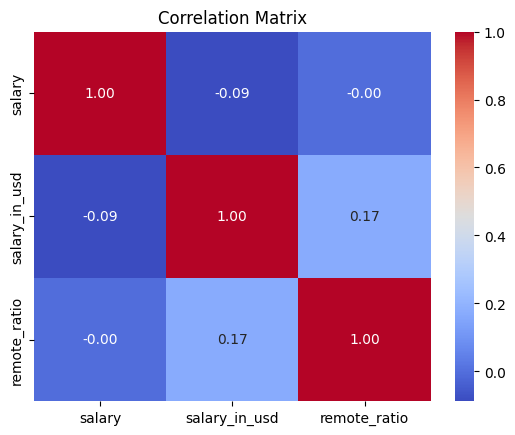

In [7]:
corr_matrix = data[['salary', 'salary_in_usd', 'remote_ratio']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Observations from Exploratory Data Analysis (EDA)

## 1. Salary Distribution
- The salary in USD is positively skewed, with most salaries concentrated at lower values and a few high outliers.

## 2. Remote Ratio vs Salary in USD
- **No Remote Work (0%)**: Employees earn lower median salaries.
- **Partially Remote (50%)**: Slightly higher median salaries compared to no remote work.
- **Fully Remote (100%)**: Highest median salaries, indicating a potential premium for fully remote roles.

## 3. Company Size vs Salary in USD
- **Small Companies (S)**: Tend to pay lower salaries.
- **Medium Companies (M)**: Offer slightly higher salaries than small companies.
- **Large Companies (L)**: Pay the highest salaries, suggesting a correlation between company size and compensation.

## 4. Correlation Matrix
- **Remote Ratio and Salary in USD**: Positive correlation, indicating that higher remote work may be associated with higher salaries.
- **Salary and Salary in USD**: Strong positive correlation, validating the currency conversion.

## 5. General Trends
- Remote work and larger company sizes appear to be positively associated with higher salaries.
- Further causal analysis is required to establish if these relationships are causal or merely correlational.


# Step 4: Prepare Data for Causal Analysis
- **Actions**:
  - **Treatment Variable**: Defined a binary variable (`treatment`) to indicate if the role involves significant remote work (`remote_ratio > 50`).
  - **Post-treatment Variable**: Created a binary variable (`post_treatment`) to indicate if the data is from the year 2021e.
  - **Interaction Term**: Added a variable (`interaction`) as the product of `treatment` and `post_treatment`.

In [8]:
data['treatment'] = (data['remote_ratio'] > 50).astype(int)
data['post_treatment'] = (data['work_year'] == '2021e').astype(int)
data['interaction'] = data['treatment'] * data['post_treatment']

# Step 5: Difference-in-Differences (DiD)  
- **Action**:
  - Used `ols()` from `statsmodels.formula.api` to fit a linear regression model with the formula:
    `salary_in_usd ~ treatment + post_treatment + interaction`.
  - The interaction term tests if the combined effect of remote work and the post-treatment period impacts salaries.


In [9]:
formula_did = 'salary_in_usd ~ treatment + post_treatment + interaction'
model_did = ols(formula_did, data=data).fit()

# Step 6: Instrumental Variables (IV) Analysis  
- **Actions**:
  - **First Stage**: Fit a regression of `remote_ratio` on `company_size` (instrument).
  - **Predicted Values**: Saved the predicted values (`remote_ratio_hat`) from the first stage.
  - **Second Stage**: Regress `salary_in_usd` on the predicted `remote_ratio_hat`.


In [10]:
first_stage = ols('remote_ratio ~ company_size', data=data).fit()
data['remote_ratio_hat'] = first_stage.fittedvalues

In [11]:
second_stage = ols('salary_in_usd ~ remote_ratio_hat', data=data).fit()


# Step 7: Display Results  
Summarized and present findings from DiD and IV models

In [12]:
print("\nDifference-in-Differences (DiD) Model Summary:\n")
print(model_did.summary())
print("\nInstrumental Variables (IV) Analysis:\n")
print("First Stage Summary:\n")
print(first_stage.summary())
print("\nSecond Stage Summary:\n")
print(second_stage.summary())


Difference-in-Differences (DiD) Model Summary:

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.454
Date:                Wed, 04 Dec 2024   Prob (F-statistic):             0.0172
Time:                        15:30:05   Log-Likelihood:                -3119.9
No. Observations:                 245   AIC:                             6248.
Df Residuals:                     241   BIC:                             6262.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

# Observations from Causal Analysis

## Difference-in-Differences (DiD) Model Summary
1. **Model Fit**:
   - The model explains only 4.1% of the variation in salary (`R-squared = 0.041`), indicating limited explanatory power.
   - The F-statistic (`3.454`) with a `p-value = 0.0172` suggests that the overall model is statistically significant, albeit weakly.

2. **Coefficients**:
   - **Treatment (Remote Work)**: The coefficient (`23810`) is positive, but the `p-value = 0.244` indicates it is not statistically significant.
   - **Post-treatment (2021e)**: The coefficient (`-7877`) is negative, with a `p-value = 0.647`, showing no statistical significance.
   - **Interaction (Treatment × Post-treatment)**: The coefficient (`13570`) is positive but not significant (`p-value = 0.570`), suggesting no evidence of a causal impact of remote work in the post-treatment period.

3. **Conclusion**:
   - The results do not provide strong evidence for a significant causal relationship between remote work, time period, and salary.

---

## Instrumental Variables (IV) Analysis

### First Stage Summary
1. **Model Fit**:
   - The first stage regression (`remote_ratio ~ company_size`) has a very low `R-squared = 0.003`, indicating that `company_size` is a weak instrument for `remote_ratio`.
   - The F-statistic (`0.396`) with a `p-value = 0.673` suggests that the instrument is not strongly correlated with the endogenous variable (`remote_ratio`).

2. **Coefficients**:
   - Neither `company_size[T.M]` nor `company_size[T.S]` has a statistically significant effect on `remote_ratio`.

3. **Conclusion**:
   - `company_size` is not a strong instrument for `remote_ratio`, raising concerns about the validity of the IV approach.

---

### Second Stage Summary
1. **Model Fit**:
   - The second stage regression (`salary_in_usd ~ remote_ratio_hat`) has an `R-squared = 0.001`, indicating that the model explains almost none of the variation in salary.
   - The F-statistic (`0.2486`) with a `p-value = 0.618` shows that the overall model is not statistically significant.

2. **Coefficients**:
   - The coefficient for the instrumented `remote_ratio` (`1250.5114`) is positive but not statistically significant (`p-value = 0.618`).

3. **Conclusion**:
   - The IV analysis fails to establish a significant causal relationship between remote work and salary, likely due to the weak instrument.

---

## General Observations
- Both the DiD and IV analyses fail to provide strong evidence for a causal relationship between remote work and salary.
- The weak explanatory power of the models suggests that additional variables or better instruments may be required to uncover causal effects.


## Example

## 1. Describe the Key Features of the Dataset

### Question:
Describe the key features in the `house_prices.csv` dataset. How might these features be used to analyze house prices?

### Explanation:
The key features in the `house_prices.csv` dataset are variables such as:

- **Size**: The total living space in the house. Larger homes typically command higher prices.
- **Location**: The geographical area or neighborhood of the property. Houses in desirable locations, such as those near amenities or in prestigious neighborhoods, are usually priced higher.
- **Number of Bedrooms**: This feature reflects the number of sleeping rooms in the house. More bedrooms can indicate larger homes, which might contribute to a higher price.
- **Year Built**: The age of the house. Newer houses are often priced higher due to their modern features and construction standards.
- **Neighborhood**: Specific areas within a city or region. Properties in more desirable neighborhoods tend to have higher market values.
- **Lot Size**: The size of the land the house sits on. Larger lots can indicate more space for living or potential future development, influencing the house's price.
- **Amenities**: Additional features such as a swimming pool, garage, or garden. These amenities can increase a house's desirability and value.

These features can be used in various ways to analyze house prices, such as identifying trends or building predictive models for estimating the price of a house based on its characteristics.


In [23]:
import pandas as pd


df = pd.read_csv('/Housing.csv')

df.info()


df.describe()


df['mainroad'].value_counts(), df['guestroom'].value_counts(), df['basement'].value_counts(), df['hotwaterheating'].value_counts(), df['airconditioning'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(mainroad
 yes    468
 no      77
 Name: count, dtype: int64,
 guestroom
 no     448
 yes     97
 Name: count, dtype: int64,
 basement
 no     354
 yes    191
 Name: count, dtype: int64,
 hotwaterheating
 no     520
 yes     25
 Name: count, dtype: int64,
 airconditioning
 no     373
 yes    172
 Name: count, dtype: int64)

## 2. Statistical Technique to Determine if a Feature Has a Causal Effect on House Quality (e.g., Price)

To analyze whether a feature (e.g., **area**, **bedrooms**, **bathrooms**) has a causal relationship with house quality (such as **price**), **regression analysis** is a suitable statistical technique.

### Step 1: Regression Analysis
- If the **independent variable** (e.g., area) is **continuous**, **linear regression** is a good choice. This technique will help model the relationship between continuous features (like area) and house price. Linear regression will show whether the feature significantly affects house price and to what extent.
  
- If the **dependent variable** (house price) is **categorical** (e.g., "expensive" vs. "affordable"), **logistic regression** is more appropriate. Logistic regression is used when the outcome is binary, and it will help determine if certain features (like area, number of bedrooms) increase the likelihood of a house being classified as expensive or affordable.

Using these techniques, we can assess the strength and direction of the relationship between various features and house quality (price), helping us understand which factors most significantly influence house pricing.


In [27]:
import statsmodels.api as sm

# Assuming 'area' is a feature in the dataset, and we want to predict 'price'
X = df[['area']]  # Independent variable (area)
y = df['price']  # Dependent variable (price)

# Add constant to the independent variables (for intercept in the model)
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary to interpret results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           7.39e-42
Time:                        16:43:25   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.0

## 3. Preparing Data for a Logistic Regression Model

To prepare data for a **logistic regression** model:

### Step 1: Ensure the Target Variable is Binary
The target variable (dependent variable) should be **binary**. For example, if we're predicting house price categories, the target variable could be **"expensive"** vs. **"affordable"**.

### Step 2: Convert Categorical Variables into Numeric Form
Logistic regression requires numeric input, so **categorical variables** must be converted. Common techniques include:
- **One-Hot Encoding**: This technique creates binary columns for each category of a categorical feature. For example, a "neighborhood" feature with categories like "A", "B", and "C" would be converted into three columns: one for each neighborhood.
- **Label Encoding**: This technique assigns a unique integer to each category. For example, "A" could be encoded as 0, "B" as 1, and "C" as 2.

By preparing the data this way, we ensure it's in a suitable format for logistic regression analysis.


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the target variable (binary classification, e.g., expensive vs. affordable)
df['price_binary'] = df['price'].apply(lambda x: 1 if x > df['price'].median() else 0)  # 1 for expensive, 0 for affordable

# Select independent variables (you can choose which features to include)
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']]

# Convert categorical variables into numerical
X = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X[['area', 'bedrooms', 'bathrooms']] = scaler.fit_transform(X[['area', 'bedrooms', 'bathrooms']])

# Define the target variable
y = df['price_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = log_reg.score(X_test, y_test)
print(f'Logistic Regression accuracy: {accuracy * 100:.2f}%')


Logistic Regression accuracy: 80.49%



## 4. Evaluate the Effectiveness of Your Causal Analysis Model

To evaluate the effectiveness of a causal analysis model, we would use several metrics. For **logistic regression**, the following are commonly used:

### Step 1: Accuracy
- **Accuracy** measures how many predictions were correct, i.e., the proportion of correct predictions out of all predictions made. It provides a general idea of how well the model performs.

### Step 2: Confusion Matrix
- The **confusion matrix** helps evaluate the classification performance by showing:
  - **True Positives (TP)**: Correctly predicted positive cases.
  - **True Negatives (TN)**: Correctly predicted negative cases.
  - **False Positives (FP)**: Incorrectly predicted positive cases.
  - **False Negatives (FN)**: Incorrectly predicted negative cases.
  
  It provides detailed insight into the types of errors the model makes.

### Step 3: ROC-AUC
- **ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve) measures how well the model distinguishes between the classes (e.g., "expensive" vs. "affordable"). A higher AUC indicates better performance, as the model is better at distinguishing between the positive and negative classes.

By using these metrics, we can assess the accuracy and effectiveness of your logistic regression model and identify areas for improvement.

Confusion Matrix:
[[70 16]
 [16 62]]
ROC-AUC Score: 0.90


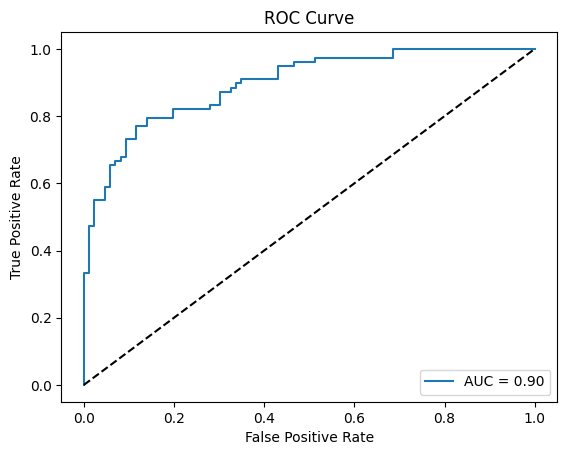

In [29]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Generate predictions
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# ROC-AUC score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Causal Analysis Interpretation

The R-squared value indicates that approximately 28.7% of the variation in house prices can be explained by the area of the property. This suggests that while area is an important factor, other factors not included in the model may also significantly influence house prices.




Area: 461.9749: This coefficient indicates that for every one unit increase in area, the price is expected to increase by approximately 461.97 units, holding other factors constant.



While the model shows a strong correlation between features and price, it's important to remember that correlation does not imply causation. The model can predict price well based on the given features, but it doesn't necessarily mean that these features directly cause changes in price. Other factors not included in the model might be influencing the relationship.

## Best Practices: Responsible Causal Inference in Data Science

### Rigorous Validation:
Causal claims should extend beyond mere statistical significance. They should be supported by robust methodologies and experimental designs where feasible, ensuring that the findings are not only statistically valid but also reliable and applicable in real-world scenarios.

### Addressing Data Biases:
It's important to proactively identify and address any biases in the dataset. This may involve collecting additional data, applying statistical techniques to adjust for biases, or consulting with domain experts to understand potential sources of bias.

### Ethical Review Processes:
For studies with significant societal implications, having an ethical review process is crucial. This may involve setting up review boards or consulting with ethical committees to evaluate the potential impact of the causal analysis.

### Continuous Education:
The field of causal inference and its ethical implications are constantly evolving. Practitioners should continuously educate themselves on new methodologies, ethical standards, and best practices. 🎓

---

## Summarizing the Importance: Understanding Causality in ML Models

### Beyond Correlation:
Emphasizing the distinction between **correlation** and **causation** is essential to prevent the overinterpretation of machine learning models. This understanding is critical in ensuring that models are not just predictive but also explanatory.

### Decision-Making:
A robust understanding of causality enhances the quality of decision-making in AI applications. This leads to more effective and ethically sound actions.

### Advancing Knowledge:
Causal inference deepens our understanding of underlying phenomena, facilitating the development of more accurate and insightful models.


## References and License

### References:
- Pearl, Judea. *Causality: Models, Reasoning, and Inference.* Cambridge University Press, 2000.
- Morgan, Stephen L., and Christopher Winship. *Counterfactuals and Causal Inference: Methods and Principles for Social Research.* Cambridge University Press, 2007.
- Imbens, Guido W., and Donald B. Rubin. *Causal Inference for Statistics, Social, and Biomedical Sciences: An Introduction.* Cambridge University Press, 2015.
- Peters, Jonas, Dominik Janzing, and Bernhard Schölkopf. *Elements of Causal Inference: Foundations and Learning Algorithms.* The MIT Press, 2017.
- Hernán, Miguel A., and James M. Robins. *Causal Inference: What If.* Chapman & Hall/CRC, 2020.

### License:
This course material, including text, illustrations, and examples, is licensed under a **Creative Commons Attribution 4.0 International License**. You are free to share and adapt the material for any purpose, even commercially, under the following terms:

- **Attribution**: You must provide appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
- **No Additional Restrictions**: You may not apply legal terms or technological measures that legally restrict others from doing anything the license permits.

### Additional Notes:
The datasets used in examples and exercises are hypothetical and created for educational purposes. This course material is designed to be accessible for learners.
